In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

"""
font:设置中文
unicode_minus:显示负号
"""
matplotlib.rcParams['font.family'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号


# 使用dataframe行列对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [2]:
look_work = pd.read_excel('F:/amyself/c题爬虫/第一题/找工作.xls')
look_ability = pd.read_excel('F:/amyself/c题爬虫/第一题/找人才.xls')
look_work = pd.DataFrame(look_work)
look_ability = pd.DataFrame(look_ability)

# 2.招聘与求职信息分析

### 应用问题1的招聘信息与求职信息构建画像：根据采集的企业招聘信息，从招聘岗位、学历要求、岗位需求量、公司类型、薪资待遇、岗位技能、企业工作地点等多个方向建立招聘信息画像；根据采集求职者求职信息，从预期岗位、薪资需求、知识储备、学历、工作经验等多个方向建立求职者画像。

### 2.1 招聘信息画像的制作

In [3]:
look_work.head(3)

,Unnamed: 0,工作id,工作更新时间,工作岗位名称,工作岗位最低工资,工作岗位最高工资,工作岗位要求经验,工作岗位要求学历,工作岗位招收人数,工作岗位具体地址,公司名称,公司所属类型,公司成立模式,公司规模,岗位技能
0,0,1631112859985510400,2023-03-02 10:03,会计实习生,3500,7000,不限,2,2,广东省深圳市宝安区西乡街道南昌社区固戍二路99号(南昌第二工业区东区)...,海柔创新科技,"[""电子商务"",""互联网""]",合资,150-500人,None
1,1,1631112859897430016,2023-03-02 10:03,技术服务工程师,5000,10000,不限,2,5,广东省深圳市宝安区西乡街道南昌社区固戍二路99号(南昌第二工业区东区)...,海柔创新科技,"[""电子商务"",""互联网""]",合资,150-500人,None
2,2,1629824814967554048,2023-02-26 20:44,大数据分析师（BI）,4500,7000,不限,3,1,广州市天河区高普路1023号1楼101室自编23号,太普软件,"[""互联网"",""软件""]",民营公司,50-100人,None


#### 2.1.1对look_work内的学历进行转码对应，0-不限 2-大专 3-本科 4-硕士 5-博士

In [4]:
look_work['工作岗位要求学历'].isnull().sum()  # 没有缺失学历的项

0

In [5]:
sum(look_work['工作岗位要求学历']  >= 6)  # 没有学历大于5的项

0

In [6]:
xueli = []
for work_xueli in look_work['工作岗位要求学历']:
    if work_xueli == 0:
        xueli.append('不限')
    elif work_xueli == 1:
        xueli.append('中专')
    elif work_xueli == 2:
        xueli.append('大专')
    elif work_xueli == 3:
        xueli.append('本科')
    elif work_xueli == 4:
        xueli.append('硕士')
    else:
        xueli.append('博士')
xueli

['大专',
 '大专',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '不限',
 '本科',
 '本科',
 '本科',
 '本科',
 '大专',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '大专',
 '大专',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '大专',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '大专',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '大专',
 '本科',
 '本科',
 '本科',
 '博士',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '大专',
 '大专',
 '大专',
 '本科',
 '大专',
 '大专',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '大专',
 '不限',
 '中专',
 '本科',
 '不限',
 '中专',
 '本科',
 '不限',
 '中专',
 '本科',
 '大专',
 '大专',
 '大专',
 '本科',
 '大专',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '大专',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',
 '本科',

In [7]:
look_work['岗位学历要求'] = xueli
look_work

,Unnamed: 0,工作id,工作更新时间,工作岗位名称,工作岗位最低工资,工作岗位最高工资,工作岗位要求经验,工作岗位要求学历,工作岗位招收人数,工作岗位具体地址,公司名称,公司所属类型,公司成立模式,公司规模,岗位技能,岗位学历要求
0,0,1631112859985510400,2023-03-02 10:03,会计实习生,3500,7000,不限,2,2,广东省深圳市宝安区西乡街道南昌社区固戍二路99号(南昌第二工业区东区)...,海柔创新科技,"[""电子商务"",""互联网""]",合资,150-500人,None,大专
1,1,1631112859897430016,2023-03-02 10:03,技术服务工程师,5000,10000,不限,2,5,广东省深圳市宝安区西乡街道南昌社区固戍二路99号(南昌第二工业区东区)...,海柔创新科技,"[""电子商务"",""互联网""]",合资,150-500人,None,大专
2,2,1629824814967554048,2023-02-26 20:44,大数据分析师（BI）,4500,7000,不限,3,1,广州市天河区高普路1023号1楼101室自编23号,太普软件,"[""互联网"",""软件""]",民营公司,50-100人,None,本科
3,3,1613439889204969472,2023-01-12 15:37,自然语言处理工程师,2000,4000,经验不限,3,0,广州大学城(大学城北)创智园3栋4楼,奇之,"[""互联网"",""数据服务""]",民营公司,50-100人,算法研究深度学习,本科
4,4,1613439536044572672,2023-01-12 15:35,爬虫工程师,2000,4000,经验不限,3,0,广州大学城(大学城北)创智园3栋4楼,奇之,"[""互联网"",""数据服务""]",民营公司,50-100人,Python爬虫框架数据采集,本科
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,1569,1463031842339946496,2021-11-23 15:24,前端开发工程师,8000,12000,经验不限,3,0,元岗路310号自编5栋,中数通,"[""数据服务"",""互联网""]",合资,500-1000人,数据查询数据计算数据挖掘数据分析数据可视化,本科
1570,1570,1374181407047421952,2021-11-23 10:34,软件测试工程师,6000,9000,1-3年,3,1,开泰大道36号凯得科学会广场1栋2楼212室,泰迪科技,"[""互联网"",""计算机软件""]",民营公司,150-500人,系统测试软件系统搭建,本科
1571,1571,1374177417123467264,2021-11-23 10:33,新媒体运营助理,5000,9000,1-3年,3,1,开泰大道36号凯得科学会广场1栋2楼212室,泰迪科技,"[""互联网"",""计算机软件""]",民营公司,150-500人,产品运营,本科
1572,1572,1374177686322286592,2021-11-23 10:32,数据产品经理,150000,300000,3-5年,3,2,开泰大道36号凯得科学会广场1栋2楼212室,泰迪科技,"[""互联网"",""计算机软件""]",民营公司,150-500人,数据探索数据可视化项目管理需求分析产品设计,本科


#### 2.1.2 绘图

##### 2.1.2 - 公司规模

In [8]:
# 公司规模
print(look_work['公司规模'].unique())

['150-500人' '50-100人' '500-1000人' '10000人以上' '少于50人' '1000-5000人'
 '5000-10000人' '1000-1500人']


In [9]:
# 对公司规模['150-500人','50-100人','500-1000人','10000人以上','少于50人','1000-5000人','5000-10000人','1000-1500人']的数量进行统计
one = sum(look_work['公司规模'] == '150-500人')
two = sum(look_work['公司规模'] == '50-100人')
three = sum(look_work['公司规模'] == '500-1000人')
four = sum(look_work['公司规模'] == '10000人以上')
five = sum(look_work['公司规模'] == '少于50人')
six = sum(look_work['公司规模'] == '1000-5000人')
seven = sum(look_work['公司规模'] == '5000-10000人')
eight = sum(look_work['公司规模'] == '1000-1500人')
guimo_list = [one,two,three,four,five,six,seven,eight]
guimo_list

[133, 1238, 88, 40, 8, 50, 15, 2]

In [ ]:
job_count = df['招聘岗位'].value_counts().reset_index()
job_count.columns = ['招聘岗位', '需求量']

。。。。略，请下载完整代码
pie_job.render('img/1.1.html')
pie_job.render_notebook()


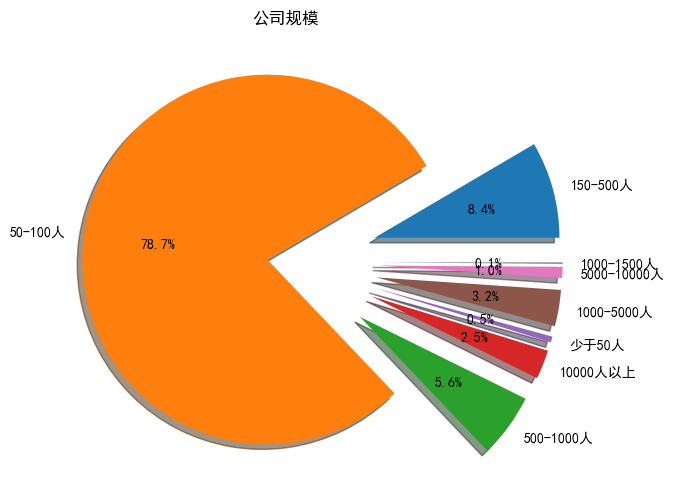

In [10]:
# 公司规模
x1 = guimo_list
plt.figure(figsize=(8,6))
plt.title('公司规模')
plt.pie(x1,explode=[0.5,0.1,0.5,0.5,0.5,0.5,0.5,0.5],labels=['150-500人','50-100人','500-1000人','10000人以上','少于50人','1000-5000人','5000-10000人','1000-1500人'], autopct='%1.1f%%',shadow=True)
plt.savefig('F:/amyself/c题爬虫/第二题/图片/公司规模.jpg')
plt.show()

##### 2.1.2 - 公司成立模式

In [11]:
# 公司成立模式
print(look_work['公司成立模式'].unique())

['合资' '民营公司' '上市公司' '国企' '私企' '外资']


In [12]:
# 对公司成立模式['合资' '民营公司' '上市公司' '国企' '私企' '外资']的数量进行统计
hezi = sum(look_work['公司成立模式'] == '合资')
mingy = sum(look_work['公司成立模式'] == '民营公司')
shangs = sum(look_work['公司成立模式'] == '上市公司')
guoqi = sum(look_work['公司成立模式'] == '国企')
siqi = sum(look_work['公司成立模式'] == '私企')
waizi = sum(look_work['公司成立模式'] == '外资')
moshi_list = [hezi,mingy,shangs,guoqi,siqi,waizi]
moshi_list

[1280, 204, 78, 9, 2, 1]

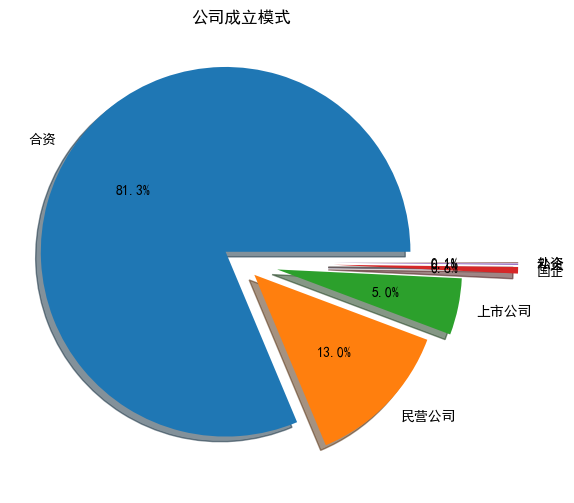

In [13]:
# 公司成立模式
x2 = moshi_list
plt.figure(figsize=(8,6))
plt.title('公司成立模式')
plt.pie(x2,explode=[0.1,0.1,0.2,0.5,0.5,0.5],labels=['合资','民营公司','上市公司','国企','私企','外资'], autopct='%1.1f%%',shadow=True)
plt.savefig('F:/amyself/c题爬虫/第二题/图片/公司成立模式.jpg')
plt.show()

##### 2.1.2 - 企业招聘工作经验要求

In [14]:
# 要求经验与薪资
a = ['工作岗位要求经验','工作岗位最低工资','工作岗位最高工资']
J_X = look_work[a]
# 查看工作经验的类别  ['不限', '经验不限', '5-10年', '1-3年', '3-5年', '5-7年', '7年以上', '3', '5', '1', '0', '10']
JY = J_X['工作岗位要求经验'].unique()
JY

array(['不限', '经验不限', '5-10年', '1-3年', '3-5年', '5-7年', '7年以上', '3', '5',
       '1', '0', '10'], dtype=object)

##### 以上发现“不限” “经验不限” “0年经验”等都是对无限制经验的同义表达，因此我们对这些同义的表达使用“replace”做给替代，让它们处于同个区间

In [15]:
J_X=J_X.replace('不限', '经验不限')
J_X=J_X.replace('0', '经验不限')
J_X=J_X.replace('1', '1-3年')
J_X=J_X.replace('3', '3-5年')
J_X=J_X.replace('5', '5-7年')
# J_X = J_X.groupby('工作岗位要求经验')
J_X['工作岗位要求经验'].unique()

array(['经验不限', '5-10年', '1-3年', '3-5年', '5-7年', '7年以上', '10'],
      dtype=object)

##### 修改后工作经验的类别['经验不限', '5-10年', '1-3年', '3-5年', '5-7年', '7年以上', '10']

In [16]:
# 对工作经验的类别的数量进行统计
jybux = sum(look_work['工作岗位要求经验'] == '经验不限')
f_t = sum(look_work['工作岗位要求经验'] == '5-10年')
o_t = sum(look_work['工作岗位要求经验'] == '1-3年')
t_f = sum(look_work['工作岗位要求经验'] == '3-5年')
f_s = sum(look_work['工作岗位要求经验'] == '5-7年')
sev = sum(look_work['工作岗位要求经验'] == '7年以上')
tene = sum(look_work['工作岗位要求经验'] == '10')

gzjy_list = [jybux,f_t,o_t,t_f,f_s,sev,tene]
gzjy_list

[264, 1, 55, 52, 6, 3, 6]

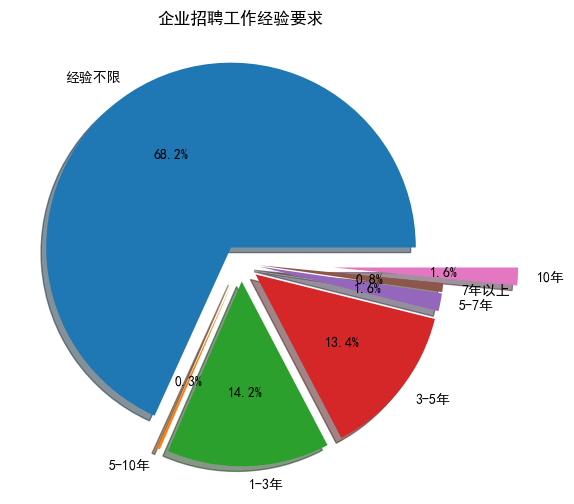

In [17]:
# 招聘岗位、学历要求、岗位需求量、公司类型、薪资待遇、岗位技能、企业工作地点
x3 = gzjy_list
plt.figure(figsize=(8,6))
plt.title('企业招聘工作经验要求')
plt.pie(x3,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.5],labels=['经验不限', '5-10年', '1-3年', '3-5年', '5-7年', '7年以上','10年'], autopct='%1.1f%%',shadow=True)
plt.savefig('F:/amyself/c题爬虫/第二题/图片/企业招聘工作经验要求.jpg')
plt.show()

##### 2.1.2 - 企业招聘学历要求

In [18]:
# 对不限、中专、大专、本科、硕士、博士的数量进行统计
buxian = sum(look_work['工作岗位要求学历'] == 0)
zhzhuan = sum(look_work['工作岗位要求学历'] == 1)
dazhuan = sum(look_work['工作岗位要求学历'] == 2)
benke = sum(look_work['工作岗位要求学历'] == 3)
shuoshi = sum(look_work['工作岗位要求学历'] == 4)
boshi = sum(look_work['工作岗位要求学历'] == 5)
xueli_list = [buxian,zhzhuan,dazhuan,benke,shuoshi,boshi]
xueli_list

[9, 11, 270, 1228, 52, 4]

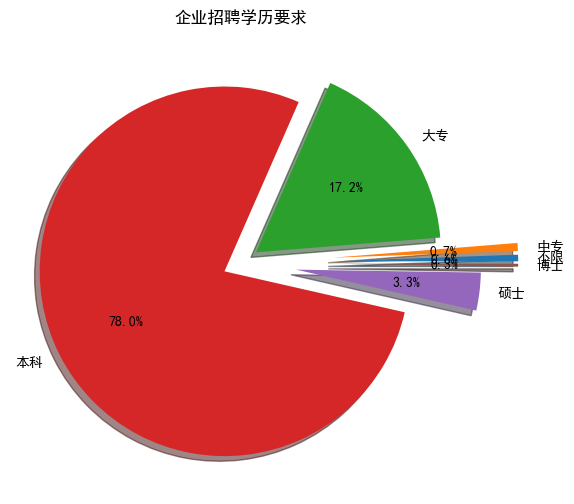

In [19]:
# 招聘岗位、学历要求、岗位需求量、公司类型、薪资待遇、岗位技能、企业工作地点
x4 = xueli_list
plt.figure(figsize=(8,6))
plt.title('企业招聘学历要求')
plt.pie(x4,explode=[0.5,0.5,0.1,0.1,0.3,0.5],labels=['不限','中专','大专','本科','硕士','博士'], autopct='%1.1f%%',shadow=True)
plt.savefig('F:/amyself/c题爬虫/第二题/图片/企业招聘学历要求.jpg')
plt.show()

##### 2.1.2 - 对应学历所招岗位的薪资待遇

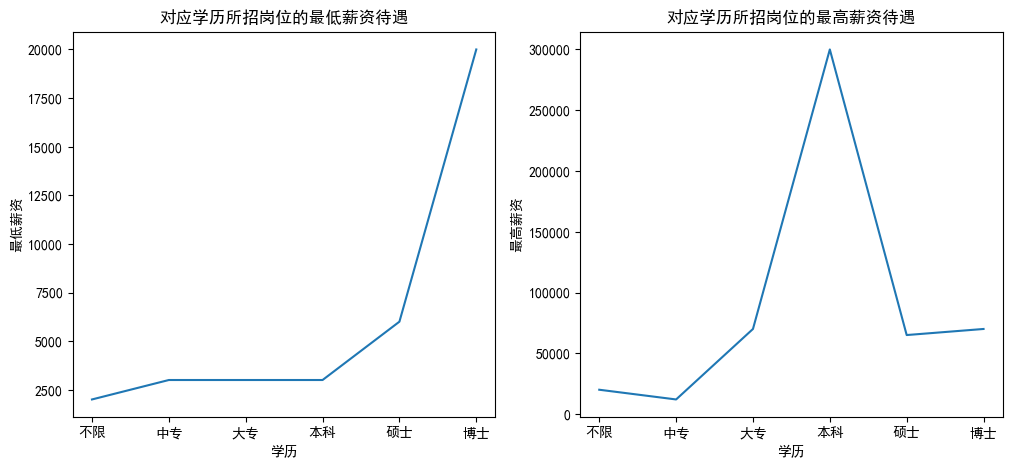

In [20]:
# 对应学历所招岗位的薪资待遇
# 最低工资
a = ['岗位学历要求','工作岗位最低工资']
minD = look_work[a]
# minD[minD['岗位学历要求'] == '不限']
buxian_m = minD[minD['岗位学历要求'] == '不限']
buxian_min = min(buxian_m['工作岗位最低工资'])
zhzhuan_m = minD[minD['岗位学历要求'] == '中专']
zhzhuan_min = min(zhzhuan_m['工作岗位最低工资'])
dazhuan_m = minD[minD['岗位学历要求'] == '大专']
dazhuan_min = min(dazhuan_m['工作岗位最低工资']) * 30 # 实习日结工资
benke_m = minD[minD['岗位学历要求'] == '本科']
benke_min = min(benke_m['工作岗位最低工资']) * 30 # 实习日结工资
shuoshi_m = minD[minD['岗位学历要求'] == '硕士']
shuoshi_min = min(shuoshi_m['工作岗位最低工资'])
boshi_m = minD[minD['岗位学历要求'] == '博士']
boshi_min = min(boshi_m['工作岗位最低工资'])

# 最高工资
b = ['岗位学历要求','工作岗位最高工资']
maxD = look_work[b]
maxD[maxD['岗位学历要求'] == '不限']
buxian_x = maxD[maxD['岗位学历要求'] == '不限']
buxian_max = max(buxian_x['工作岗位最高工资'])
zhzhuan_x = maxD[maxD['岗位学历要求'] == '中专']
zhzhuan_max = max(zhzhuan_x['工作岗位最高工资'])
dazhuan_x = maxD[maxD['岗位学历要求'] == '大专']
dazhuan_max = max(dazhuan_x['工作岗位最高工资'])
benke_x = maxD[maxD['岗位学历要求'] == '本科']
benke_max = max(benke_x['工作岗位最高工资'])
shuoshi_x = maxD[maxD['岗位学历要求'] == '硕士']
shuoshi_max = max(shuoshi_x['工作岗位最高工资'])
boshi_x = maxD[maxD['岗位学历要求'] == '博士']
boshi_max = max(boshi_x['工作岗位最高工资'])

# 绘折线图
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('对应学历所招岗位的最低薪资待遇')
x5 = ['不限','中专','大专','本科','硕士','博士']
plt.xlabel('学历')
y5 = [buxian_min,zhzhuan_min,dazhuan_min,benke_min,shuoshi_min,boshi_min]
plt.ylabel('最低薪资')
plt.plot(x5,y5)
plt.savefig('F:/amyself/c题爬虫/第二题/图片/对应学历所招岗位的最低薪资待遇.jpg')

plt.subplot(122)
plt.title('对应学历所招岗位的最高薪资待遇')
x6 = ['不限','中专','大专','本科','硕士','博士']
plt.xlabel('学历')
y6 = [buxian_max,zhzhuan_max,dazhuan_max,benke_max,shuoshi_max,boshi_max]
plt.ylabel('最高薪资')
plt.plot(x6,y6)
plt.savefig('F:/amyself/c题爬虫/第二题/图片/对应学历所招岗位的最高薪资待遇.jpg')

##### 2.1.2 - 岗位需求量-招聘岗位

In [21]:
# 岗位需求量 - 招聘岗位
a5 = ['工作岗位招收人数','工作岗位名称']
ganwxuq = look_work[a5]
ganwxuq #发现招收的岗位有0值的出现

,工作岗位招收人数,工作岗位名称
0,2,会计实习生
1,5,技术服务工程师
2,1,大数据分析师（BI）
3,0,自然语言处理工程师
4,0,爬虫工程师
...,...,...
1569,0,前端开发工程师
1570,1,软件测试工程师
1571,1,新媒体运营助理
1572,2,数据产品经理


In [22]:
ganwxuq['工作岗位招收人数'].isnull().sum()

0

##### 可见删除了招收人数为0后的岗位只剩下1454，即总共有120个岗位招收的人数是0

In [23]:
ganwxuq=ganwxuq.replace(0, np.nan)
ganwxuq=ganwxuq.dropna()
ganwxuq

,工作岗位招收人数,工作岗位名称
0,2.0,会计实习生
1,5.0,技术服务工程师
2,1.0,大数据分析师（BI）
9,1.0,解决方案
10,1.0,产品总监
...,...,...
1566,2.0,院校咨询招生
1570,1.0,软件测试工程师
1571,1.0,新媒体运营助理
1572,2.0,数据产品经理


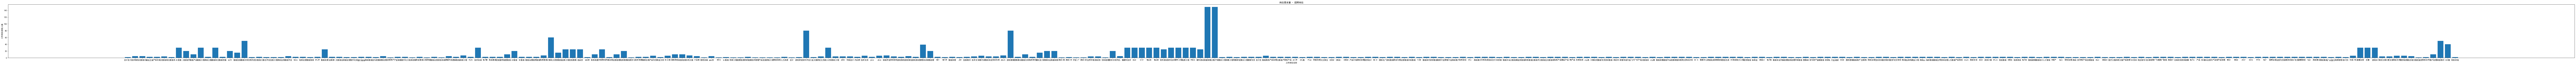

In [24]:
# 提取技能要求的前4个关键字,因为图片太长放不下,双击点开可以放大看，截图做笔记的时候截中间明显部分
ganwxuq['工作岗位名称']=ganwxuq['工作岗位名称'].apply(lambda x: x[0:4])
x7 = ganwxuq['工作岗位名称']
y7 = ganwxuq['工作岗位招收人数']
plt.figure(figsize=(240,5))
plt.title('岗位需求量 - 招聘岗位')
plt.xlabel('工作岗位名称')
plt.ylabel('工作岗位招收人数')
plt.bar(x7,y7,width=0.8)
plt.savefig('F:/amyself/c题爬虫/第二题/图片/岗位需求量-招聘岗位.jpg')
plt.show()

##### 2.1.2 - 对应工作岗位要求经验所招岗位的薪资待遇

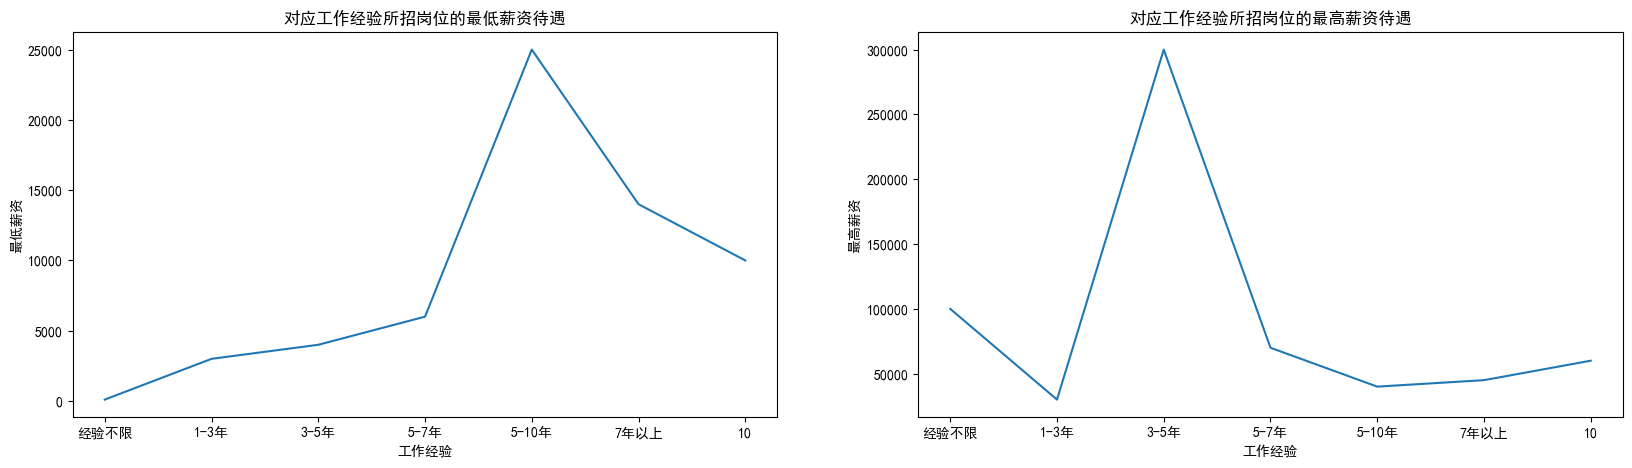

In [37]:
# 对应工作岗位要求经验所招岗位的薪资待遇
# 最低工资
jyd = ['工作岗位要求经验','工作岗位最低工资']
minJY = look_work[jyd]
jybux_m = minJY[minJY['工作岗位要求经验'] == '经验不限']
jybux_min = min(jybux_m['工作岗位最低工资'])
o_t_m = minJY[minJY['工作岗位要求经验'] == '1-3年']
o_t_min = min(o_t_m['工作岗位最低工资'])
f_t_m = minJY[minJY['工作岗位要求经验'] == '5-10年']
f_t_min = min(f_t_m['工作岗位最低工资'])
t_f_m = minJY[minJY['工作岗位要求经验'] == '3-5年']
t_f_min = min(t_f_m['工作岗位最低工资'])
f_s_m = minJY[minJY['工作岗位要求经验'] == '5-7年']
f_s_min = min(f_s_m['工作岗位最低工资'])
sev_m = minJY[minJY['工作岗位要求经验'] == '7年以上']
sev_min = min(sev_m['工作岗位最低工资'])
tenn_m = minJY[minJY['工作岗位要求经验'] == '10']
tenn_min = min(tenn_m['工作岗位最低工资'])

# 最高工资
jyg = ['工作岗位要求经验','工作岗位最高工资']
maxJY = look_work[jyg]
jybux_x = maxJY[maxJY['工作岗位要求经验'] == '经验不限']
jybux_max = max(jybux_x['工作岗位最高工资'])
o_t_x = maxJY[maxJY['工作岗位要求经验'] == '1-3年']
o_t_max = max(o_t_x['工作岗位最高工资'])
f_t_x = maxJY[maxJY['工作岗位要求经验'] == '5-10年']
f_t_max = max(f_t_x['工作岗位最高工资'])
t_f_x = maxJY[maxJY['工作岗位要求经验'] == '3-5年']
t_f_max = max(t_f_x['工作岗位最高工资'])
f_s_x = maxJY[maxJY['工作岗位要求经验'] == '5-7年']
f_s_max = max(f_s_x['工作岗位最高工资'])
sev_x = maxJY[maxJY['工作岗位要求经验'] == '7年以上']
sev_max = max(sev_x['工作岗位最高工资'])
tenn_x = maxJY[maxJY['工作岗位要求经验'] == '10']
tenn_max = max(tenn_x['工作岗位最高工资'])

# 绘折线图
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('对应工作经验所招岗位的最低薪资待遇')
x8 = ['经验不限', '1-3年','3-5年','5-7年', '5-10年', '7年以上', '10']
plt.xlabel('工作经验')
y8 = [jybux_min,o_t_min,t_f_min,f_s_min,f_t_min,sev_min,tenn_min]
plt.ylabel('最低薪资')
plt.plot(x8,y8)
plt.savefig('F:/amyself/c题爬虫/第二题/图片/对应工作经验所招岗位的最低薪资待遇.jpg')

plt.subplot(122)
plt.title('对应工作经验所招岗位的最高薪资待遇')
x9 = ['经验不限', '1-3年','3-5年','5-7年', '5-10年', '7年以上', '10']
plt.xlabel('工作经验')
y9 = [jybux_max,o_t_max,t_f_max,f_s_max,f_t_max,sev_max,tenn_max]
plt.ylabel('最高薪资')
plt.plot(x9,y9)
plt.savefig('F:/amyself/c题爬虫/第二题/图片/对应工作经验所招岗位的最高薪资待遇.jpg')

##### 2.1.2 - 岗位技能-招聘岗位

In [26]:
# 岗位技能 - 招聘岗位 出去对岗位没有对应技能要求的，总共有232个岗位对技能有要求
a4 = ['岗位技能','工作岗位名称']
jineng = look_work[a4]
# jineng[jineng['岗位技能'] == 'None']
jineng=jineng.replace('None', np.nan)
jineng=jineng.dropna()
jineng

,岗位技能,工作岗位名称
3,算法研究深度学习,自然语言处理工程师
4,Python爬虫框架数据采集,爬虫工程师
5,Pythondjango软件系统搭建,Python/django后台开发工程师
6,运营管理,团队运营管理实习生
7,技术文章撰写,技术文章撰写实习生
...,...,...
1569,数据查询数据计算数据挖掘数据分析数据可视化,前端开发工程师
1570,系统测试软件系统搭建,软件测试工程师
1571,产品运营,新媒体运营助理
1572,数据探索数据可视化项目管理需求分析产品设计,数据产品经理


In [27]:
jineng.groupby('工作岗位名称')
jineng.reset_index().tail(5) # 重新设置索引，得知共有232条数据

,index,岗位技能,工作岗位名称
227,1569,数据查询数据计算数据挖掘数据分析数据可视化,前端开发工程师
228,1570,系统测试软件系统搭建,软件测试工程师
229,1571,产品运营,新媒体运营助理
230,1572,数据探索数据可视化项目管理需求分析产品设计,数据产品经理
231,1573,数据探索数据查询数据建模,数据分析实习生


In [28]:
# 提取技能要求的前六个关键字
jineng['岗位技能']=jineng['岗位技能'].apply(lambda x: x[0:6])
jineng.tail(5)

,岗位技能,工作岗位名称
1569,数据查询数据,前端开发工程师
1570,系统测试软件,软件测试工程师
1571,产品运营,新媒体运营助理
1572,数据探索数据,数据产品经理
1573,数据探索数据,数据分析实习生


In [29]:
list_jineng = jineng['岗位技能'].unique()
# list_jineng=np.append(list_jineng,jineng_a)
len(list_jineng)  # 总共有99中技能要求 232个岗位对技能有要求

99

##### 相关 岗位技能 - 招聘岗位 热力呈现图见图片页。

### 以下是对 招聘信息画像 的集合

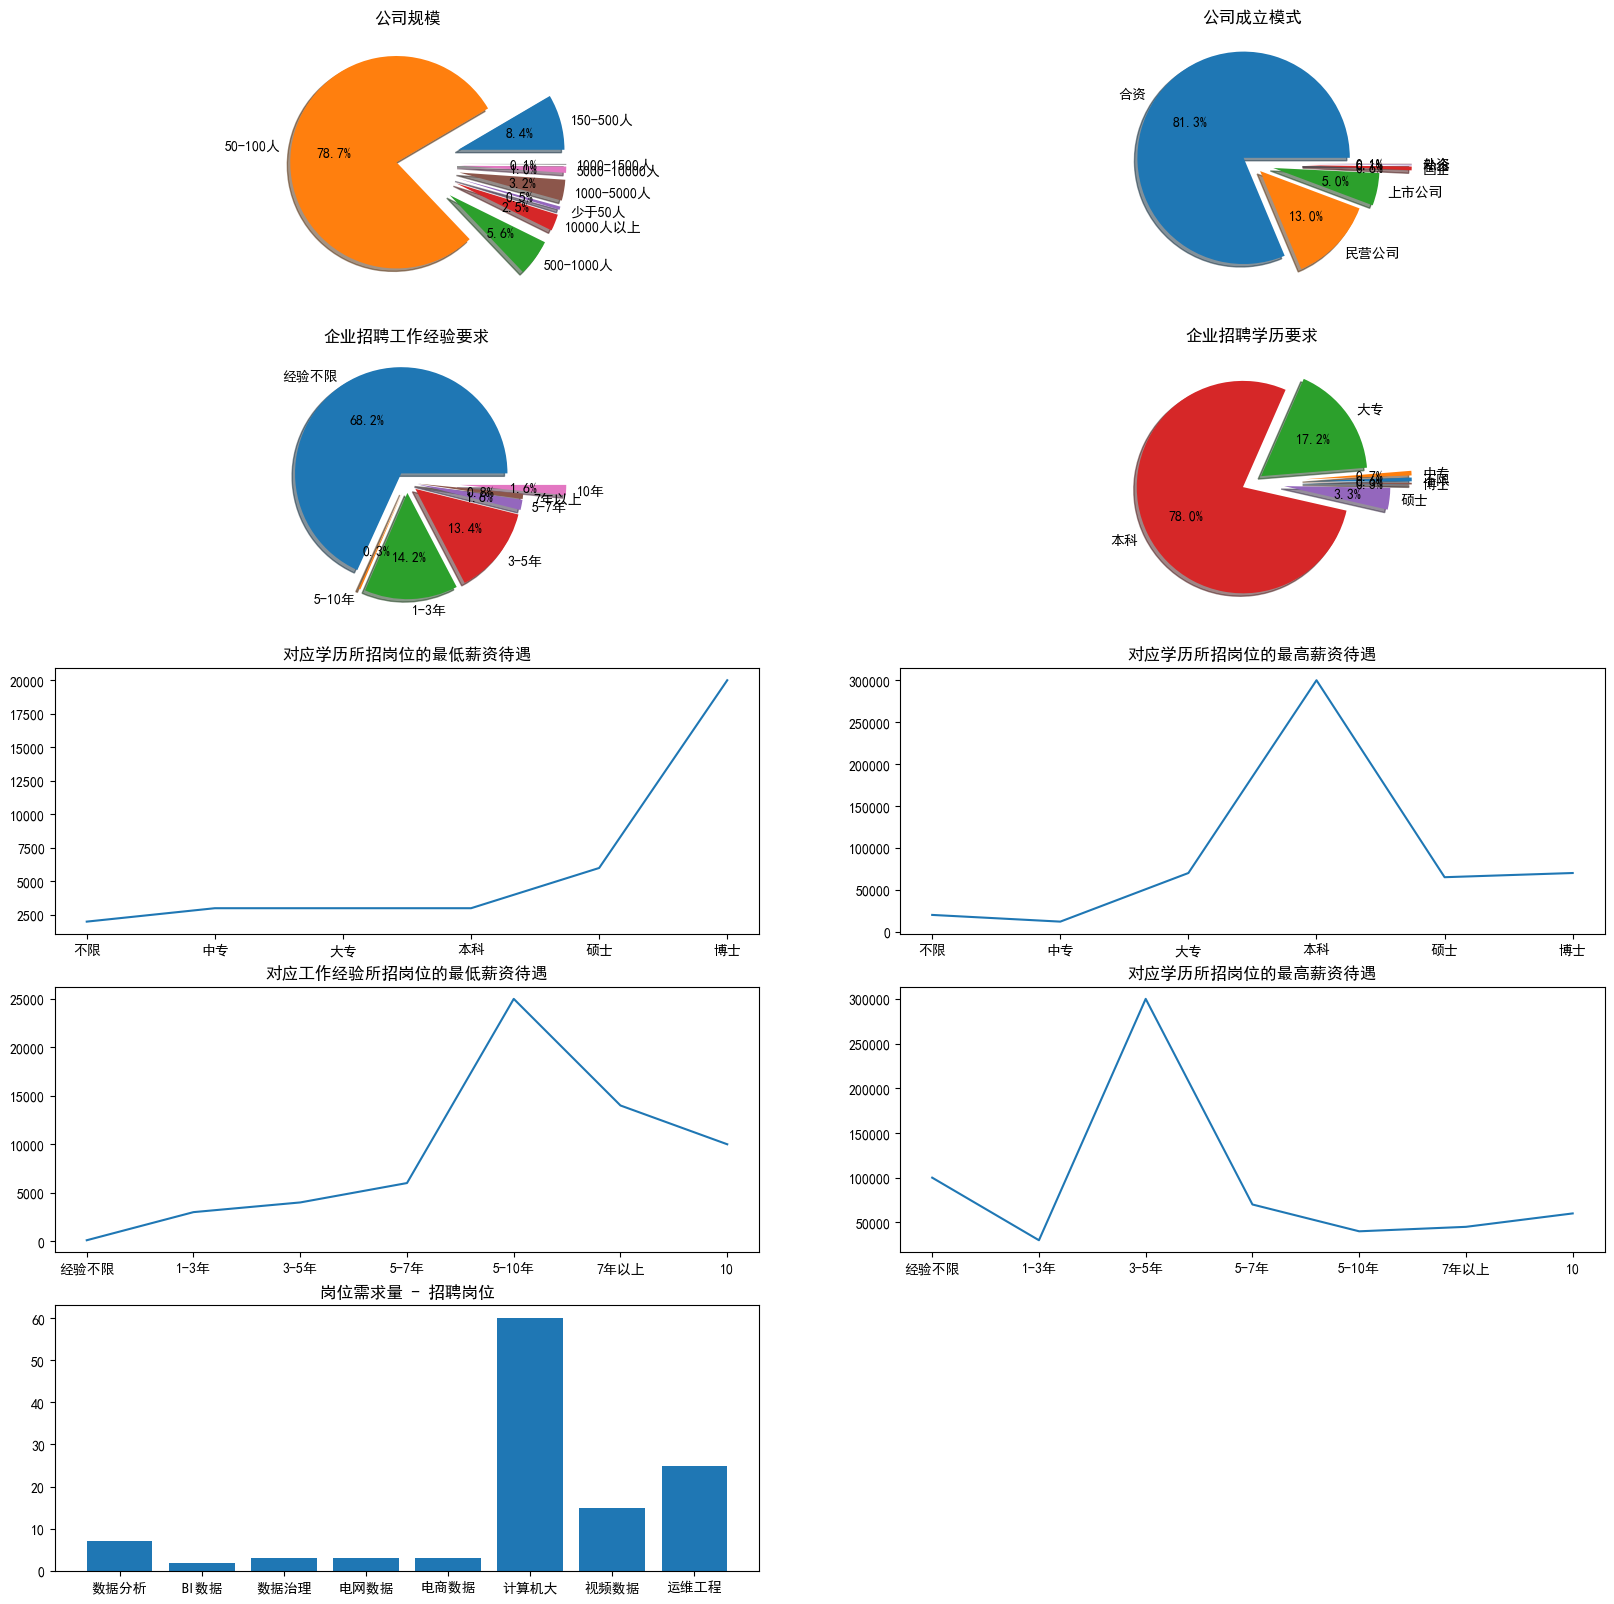

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
plt.title('公司规模')
plt.pie(x1,explode=[0.5,0.1,0.5,0.5,0.5,0.5,0.5,0.5],labels=['150-500人','50-100人','500-1000人','10000人以上','少于50人','1000-5000人','5000-10000人','1000-1500人'], autopct='%1.1f%%',shadow=True)
plt.subplot(5,2,2)
plt.title('公司成立模式')
plt.pie(x2,explode=[0.1,0.1,0.2,0.5,0.5,0.5],labels=['合资','民营公司','上市公司','国企','私企','外资'], autopct='%1.1f%%',shadow=True)
plt.subplot(5,2,3)
plt.title('企业招聘工作经验要求')
plt.pie(x3,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.5],labels=['经验不限', '5-10年', '1-3年', '3-5年', '5-7年', '7年以上','10年'], autopct='%1.1f%%',shadow=True)
plt.subplot(5,2,4)
plt.title('企业招聘学历要求')
plt.pie(x4,explode=[0.5,0.5,0.1,0.1,0.3,0.5],labels=['不限','中专','大专','本科','硕士','博士'], autopct='%1.1f%%',shadow=True)
plt.subplot(5,2,5)
plt.title('对应学历所招岗位的最低薪资待遇')
plt.plot(x5,y5)
plt.subplot(5,2,6)
plt.title('对应学历所招岗位的最高薪资待遇')
plt.plot(x6,y6)
plt.subplot(5,2,7)
plt.title('对应工作经验所招岗位的最低薪资待遇')
plt.plot(x8,y8)
plt.subplot(5,2,8)
plt.title('对应学历所招岗位的最高薪资待遇')
plt.plot(x9,y9)
plt.subplot(5,2,9)
plt.title('岗位需求量 - 招聘岗位')
plt.bar(x7[100:108],y7[100:108],width=0.8)
plt.savefig('F:/amyself/c题爬虫/第二题/图片/招聘信息画像.jpg')
plt.show()

In [31]:
# 制作广东省岗位要求词云
GDS_data1 = ['工作岗位具体地址','岗位技能']
GDS_d = look_work[GDS_data1]
GDS_d['工作岗位具体地址']=GDS_d['工作岗位具体地址'].apply(lambda x: x[0:3])  # 有一些地址例如“广州”不足三个字符，会报错但可以忽略
# ['广东省深圳市','广东省东莞','广东省佛山市','广东省中山市','广东省广州市'] # 通过Tableau可视化工具可知广东省内包含技能要求只有这五个地区
GDS_chengshi = GDS_d[GDS_d['工作岗位具体地址'] == '广东省']
GDS_chengshi = GDS_chengshi.replace('None',np.nan)  # 会出现一部分没有技能要求的是None，将其转为空值就可以直接删除
GDS_chengshi = GDS_chengshi.dropna()
GDS_chengshi = GDS_chengshi.reset_index()  # 重新设置索引拿到我们需要的49条数据
GDS_chengshi
# GDS_data2 = ['工作岗位具体地址','工作岗位名称']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23056\1161110174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDS_d['工作岗位具体地址']=GDS_d['工作岗位具体地址'].apply(lambda x: x[0:3])  # 有一些地址例如“广州”不足三个字符，会报错但可以忽略


,index,工作岗位具体地址,岗位技能
0,88,广东省,机器学习
1,104,广东省,数据预处理
2,105,广东省,数据预处理数据分析数据探索
3,106,广东省,数据分析数据可视化数据预处理
4,107,广东省,数据可视化数据分析数据预处理
5,108,广东省,数据计算数据可视化需求分析
6,109,广东省,数据可视化数据分析数据挖掘数据查询
7,216,广东省,数据可视化
8,218,广东省,数据采集数据分析数据探索
9,220,广东省,神经网络数据探索产品运营项目管理系统测试


In [32]:
ciyun_list = GDS_chengshi['岗位技能']
ciyun_list1 = []
for i in ciyun_list:
    ciyun_list1.append(i)
ciyun_list1

['机器学习',
 '数据预处理',
 '数据预处理数据分析数据探索',
 '数据分析数据可视化数据预处理',
 '数据可视化数据分析数据预处理',
 '数据计算数据可视化需求分析',
 '数据可视化数据分析数据挖掘数据查询',
 '数据可视化',
 '数据采集数据分析数据探索',
 '神经网络数据探索产品运营项目管理系统测试',
 '软件系统搭建',
 '数据计算机器学习',
 '数据挖掘数据分析',
 '数据分析数据探索数据预处理项目管理数据采集',
 '数据采集数据挖掘数据探索数据分析',
 '数据分析数据探索数据可视化数据采集',
 '数据分析',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据预处理数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发']

In [33]:
ciyun_list = GDS_chengshi['岗位技能']
ciyun_list1 = []
for i in ciyun_list:
    ciyun_list1.append(i)
ciyun_list1

['机器学习',
 '数据预处理',
 '数据预处理数据分析数据探索',
 '数据分析数据可视化数据预处理',
 '数据可视化数据分析数据预处理',
 '数据计算数据可视化需求分析',
 '数据可视化数据分析数据挖掘数据查询',
 '数据可视化',
 '数据采集数据分析数据探索',
 '神经网络数据探索产品运营项目管理系统测试',
 '软件系统搭建',
 '数据计算机器学习',
 '数据挖掘数据分析',
 '数据分析数据探索数据预处理项目管理数据采集',
 '数据采集数据挖掘数据探索数据分析',
 '数据分析数据探索数据可视化数据采集',
 '数据分析',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据预处理数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发',
 '数据开发']

In [34]:
from collections import Counter  # 计算每个技能描述的出现次数
count = Counter(ciyun_list)
print(count)

# 打印每一个key
key_list = []
for item in count.items():
    key_list.append(item[0])
print(key_list)

# 打印每一个value
value_list = []
for item in count.items():
    value_list.append(item[1])
print(value_list)

Counter({'数据开发': 31, '机器学习': 1, '数据预处理': 1, '数据预处理数据分析数据探索': 1, '数据分析数据可视化数据预处理': 1, '数据可视化数据分析数据预处理': 1, '数据计算数据可视化需求分析': 1, '数据可视化数据分析数据挖掘数据查询': 1, '数据可视化': 1, '数据采集数据分析数据探索': 1, '神经网络数据探索产品运营项目管理系统测试': 1, '软件系统搭建': 1, '数据计算机器学习': 1, '数据挖掘数据分析': 1, '数据分析数据探索数据预处理项目管理数据采集': 1, '数据采集数据挖掘数据探索数据分析': 1, '数据分析数据探索数据可视化数据采集': 1, '数据分析': 1, '数据预处理数据开发': 1})
['机器学习', '数据预处理', '数据预处理数据分析数据探索', '数据分析数据可视化数据预处理', '数据可视化数据分析数据预处理', '数据计算数据可视化需求分析', '数据可视化数据分析数据挖掘数据查询', '数据可视化', '数据采集数据分析数据探索', '神经网络数据探索产品运营项目管理系统测试', '软件系统搭建', '数据计算机器学习', '数据挖掘数据分析', '数据分析数据探索数据预处理项目管理数据采集', '数据采集数据挖掘数据探索数据分析', '数据分析数据探索数据可视化数据采集', '数据分析', '数据开发', '数据预处理数据开发']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 31, 1]


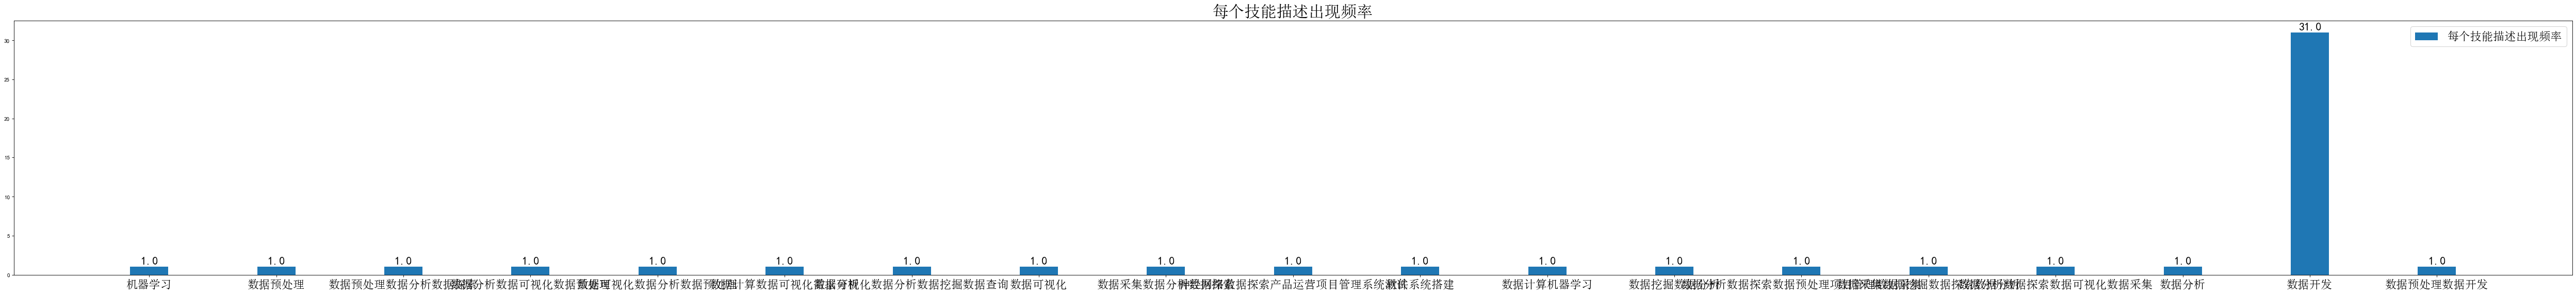

In [35]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

my_font = font_manager.FontProperties(fname='G:/FTP/a学校资料/项目实训_I/simsun.ttc', size=20)

a = key_list
b = value_list

plt.figure(figsize=(80, 8), dpi=80)

# 条形图
rects = plt.bar(range(len(a)), [float(i) for i in b], width=0.3,label='每个技能描述出现频率')
plt.xticks(range(len(a)), a, fontproperties=my_font)
# plt.yticks(range(0,41,5),range(0,41,5),fontproperties=my_font)

# 水平居中
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.3, str(height), ha='center', size=20)
plt.title('每个技能描述出现频率', fontproperties=my_font, size=28)
plt.legend(prop=my_font)
plt.show()


In [36]:
import jieba
from wordcloud import WordCloud
import numpy as np
from PIL import Image

img = Image.open("F:/amyself/c题爬虫/第二题/地图.jpg")  # 打开遮罩图片
mask = np.array(img)  # 将图片转换为数组

words = open('F:/aaaa.txt', encoding='utf8').read()

new_words = ' '.join(jieba.cut(words))  # 使用jieba.cut分词，然后把分好的词变成一个字符串，每个词用空格隔开
font = "G:/FTP/a学校资料/项目实训_I/simsun.ttc"
wordcloud = WordCloud(width=1000,  # 宽度
                      height=860,  # 高度
                      margin=2,  # 边距
                      font_path=font,
                      mask=mask,
                      background_color='white',
                      )
wordcloud.generate(new_words)  # 分词
wordcloud.to_file('F:/lyxb3.jpg')  # 保存到图片
print(new_words)

### 2.2 招聘信息画像的制作

#### 根据采集求职者求职信息，从预期岗位、薪资需求、知识储备、学历、工作经验等多个方向建立求职者画像

In [3]:
look_ability.head(5)

,人才id,姓名,性别,工作经验,应聘工作岗位,最低薪资期望,最高薪资期望,所在城市,上传时间,个人技能
0,1635610357617786880,欧先生,0.0,无经验,"[""数据分析师"",""数据挖掘工程师"",""算法工程师""]",3000,4000,"[""广东省"",""广州市"",""天河区""]",2023-03-14,None
1,1634019092572798976,赖女士,1.0,无经验,"[""数据分析师""]",4000,5000,"[""江苏省"",""南京市"",""江宁区""]",2023-03-10,None
2,1632947816114552832,梁先生,0.0,1年工作经验,"[""数据分析师"",""数据挖掘工程师"",""机器学习工程师""]",6000,7000,"[""广东省"",""广州市"",""天河区""]",2023-03-07,None
3,1632286586903330816,钟先生,0.0,无经验,"[""数据分析师"",""数据挖掘工程师"",""机器学习工程师""]",4000,6000,"[""广东省"",""广州市"",""黄埔区""]",2023-03-05,None
4,1579833809761861632,李先生,0.0,无经验,"[""数据分析师"",""数据挖掘工程师""]",4000,8000,"[""广东省"",""深圳市"",""南山区""]",2023-03-03,None


##### 根据性别做求职者画像

##### 男性-应聘工作岗位

In [4]:
ability_s = ['性别','应聘工作岗位']
ability_sex = look_ability[ability_s]

ability_man = ability_sex[ability_sex['性别']==0.0] # 获取男性数据
ability_man

,性别,应聘工作岗位
0,0.0,"[""数据分析师"",""数据挖掘工程师"",""算法工程师""]"
2,0.0,"[""数据分析师"",""数据挖掘工程师"",""机器学习工程师""]"
3,0.0,"[""数据分析师"",""数据挖掘工程师"",""机器学习工程师""]"
4,0.0,"[""数据分析师"",""数据挖掘工程师""]"
5,0.0,"[""数据分析师"",""其他"",""数据挖掘工程师""]"
...,...,...
10894,0.0,"[""数据分析师"",""数据挖掘工程师""]"
10896,0.0,"[""数据分析师"",""数据挖掘工程师""]"
10900,0.0,"[""数据分析师"",""数据挖掘工程师""]"
10902,0.0,"[""数据分析师"",""数据挖掘工程师""]"


In [5]:
ability_man_gw = ability_man['应聘工作岗位']
from collections import Counter  # 计算每个技能描述的出现次数
count = Counter(ability_man_gw)
print(count)

Counter({'["数据分析师","数据挖掘工程师"]': 1091, '["Hadoop大数据开发工程师"]': 25, '["数据分析师"]': 14, '["其他"]': 7, '["数据分析师","数据挖掘工程师","机器学习工程师"]': 6, '["数据分析师","数据挖掘工程师","算法工程师"]': 4, '["Hadoop大数据开发工程师","数据挖掘工程师"]': 4, '["数据分析师","其他"]': 3, '["数据分析师","Hadoop大数据开发工程师"]': 3, '["Hadoop大数据开发工程师","其他"]': 3, '["数据分析师","数据挖掘工程师","其他"]': 2, '["数据挖掘工程师","数据分析师","机器学习工程师"]': 2, '["机器学习工程师"]': 2, '["Hadoop大数据开发工程师","数据分析师"]': 2, '["图像处理工程师"]': 2, '["数据挖掘工程师"]': 2, '["其他","Hadoop大数据开发工程师"]': 2, '["数据分析师","其他","数据挖掘工程师"]': 1, '["数据分析师","自然语言处理工程师","机器学习工程师"]': 1, '["数据分析师","数据挖掘工程师","图像处理工程师"]': 1, '["数据挖掘工程师","算法工程师"]': 1, '["其他","数据分析师","机器学习工程师"]': 1, '["数据挖掘工程师","自然语言处理工程师"]': 1, '["数据分析师","其他","机器学习工程师"]': 1, '["数据分析师","数据挖掘工程师","Hadoop大数据开发工程师"]': 1, '["数据分析师","图像处理工程师","算法工程师"]': 1, '["Hadoop大数据开发工程师","数据挖掘工程师","机器学习工程师"]': 1, '["Hadoop大数据开发工程师","数据分析师","其他"]': 1, '["数据挖掘工程师","数据分析师","计算机视觉工程师"]': 1, '["数据分析师","自然语言处理工程师","其他"]': 1, '["数据分析师","数据挖掘工程师","自然语言处理工程师"]': 1, '["数据分析师","自然语言处理工程师","数据挖掘工程师"]': 1, '["H

In [6]:
ability_man_gw = pd.DataFrame(ability_man_gw)
ability_man_gw

,应聘工作岗位
0,"[""数据分析师"",""数据挖掘工程师"",""算法工程师""]"
2,"[""数据分析师"",""数据挖掘工程师"",""机器学习工程师""]"
3,"[""数据分析师"",""数据挖掘工程师"",""机器学习工程师""]"
4,"[""数据分析师"",""数据挖掘工程师""]"
5,"[""数据分析师"",""其他"",""数据挖掘工程师""]"
...,...
10894,"[""数据分析师"",""数据挖掘工程师""]"
10896,"[""数据分析师"",""数据挖掘工程师""]"
10900,"[""数据分析师"",""数据挖掘工程师""]"
10902,"[""数据分析师"",""数据挖掘工程师""]"


In [7]:
ability_man_gw.to_csv('F:/amyself/c题爬虫/第二题/用户画像/csv/应聘工作岗位_man.csv')

### 将“ability_man_gw”-男性对应的应聘岗位存储进csv文件中，再直接在csv文件中做替换字段清洗数据中的中括号、双引号、逗号等影响因素字段，最后把csv文件的后缀改为txt文本文件的后缀，并把编码改为‘utf-8’，保存进txt对应的目录中。

In [8]:
# 将字段转化为字符串并保存到文本文件中，方便结巴库去截取字符串字段
a = str(ability_man_list)
filepath = 'F:/amyself/c题爬虫/第二题/用户画像/txt/应聘工作岗位_man.txt'
with open(filepath,'w') as f:
   f.write(a)

import jieba
from wordcloud import WordCloud
import numpy as np
from PIL import Image

img = Image.open("F:/amyself/c题爬虫/第二题/用户画像/图片/男.png")  # 打开遮罩图片
mask = np.array(img)  # 将图片转换为数组

words = open('F:/amyself/c题爬虫/第二题/用户画像/txt/应聘工作岗位_man.txt', encoding='utf-8').read()

new_words = ' '.join(jieba.cut(words))  # 使用jieba.cut分词，然后把分好的词变成一个字符串，每个词用空格隔开
font = "F:/amyself/c题爬虫/第二题/招聘信息画像/字体/simsun.ttc"
wordcloud = WordCloud(width=1200,  # 宽度
                      height=1200,  # 高度
                      margin=120,  # 边距
                      font_path=font,
                      mask=mask,
                      background_color='white',
                      )
wordcloud.generate(new_words)  # 分词
wordcloud.to_file('F:/amyself/c题爬虫/第二题/用户画像/图片/男性应聘工作岗位词云图.jpg')  # 保存到图片

##### 女性-应聘工作岗位

In [9]:
ability_woman = ability_sex[ability_sex['性别']==1.0] # 获取女性数据
ability_woman

,性别,应聘工作岗位
1,1.0,"[""数据分析师""]"
11,1.0,"[""数据分析师""]"
14,1.0,"[""其他""]"
15,1.0,"[""数据分析师"",""其他""]"
19,1.0,"[""项目经理"",""新媒体运营实习生"",""产品助理""]"
...,...,...
10901,1.0,"[""项目经理"",""新媒体运营实习生"",""产品助理""]"
10904,1.0,"[""项目经理"",""新媒体运营实习生"",""产品助理""]"
10905,1.0,"[""项目经理"",""新媒体运营实习生"",""产品助理""]"
10906,1.0,"[""项目经理"",""新媒体运营实习生"",""产品助理""]"


In [10]:
ability_woman = ability_woman['应聘工作岗位']
from collections import Counter  # 计算每个技能描述的出现次数
count = Counter(ability_woman)
print(count)

Counter({'["项目经理","产品经理","资质管理员","电商大数据研究员"]': 840, '["项目经理","新媒体运营实习生","产品助理"]': 50, '["数据分析师"]': 22, '["Hadoop大数据开发工程师"]': 7, '["数据分析师","其他"]': 6, '["其他"]': 5, '["数据分析师","数据挖掘工程师","自然语言处理工程师"]': 5, '["数据分析师","数据挖掘工程师","其他"]': 4, '["数据分析师","产品经理"]': 4, '["数据分析师","数据挖掘工程师","算法工程师"]': 3, '["数据分析师","自然语言处理工程师"]': 3, '["Hadoop大数据开发工程师","数据分析师"]': 2, '["数据分析师","数据挖掘工程师","图像处理工程师"]': 2, '["数据分析师","机器学习工程师"]': 2, '["项目经理","产品经理"]': 2, '["数据挖掘工程师","Hadoop大数据开发工程师"]': 1, '["数据分析师","机器学习工程师","数据挖掘工程师"]': 1, '["数据挖掘工程师","算法工程师"]': 1, '["数据分析师","Hadoop大数据开发工程师","其他"]': 1, '["Hadoop大数据开发工程师","数据分析师","其他"]': 1, '["数据分析师","数据挖掘工程师","机器学习工程师"]': 1, '["数据分析师","图像处理工程师","其他"]': 1, '["数据分析师","机器学习工程师","图像处理工程师"]': 1, '["算法工程师","数据分析师","机器学习工程师"]': 1, '["数据分析师","数据挖掘工程师","Hadoop大数据开发工程师"]': 1, '["Hadoop大数据开发工程师","其他"]': 1, '["数据分析师","计算机视觉工程师","自然语言处理工程师"]': 1, '["数据分析师","Hadoop大数据开发工程师"]': 1, '["数据分析师","其他","数据挖掘工程师"]': 1, '["数据分析师","机器学习工程师","Hadoop大数据开发工程师"]': 1, '["数据分析师","图像处理工程师","机器学习工程师"]': 1, '[

In [11]:
ability_woman_gw = pd.DataFrame(ability_woman)
ability_woman_gw.to_csv('F:/amyself/c题爬虫/第二题/用户画像/csv/应聘工作岗位_woman.csv')

### 将“ability_woman_gw”-女性对应的应聘岗位存储进csv文件中，再直接在csv文件中做替换字段清洗数据中的中括号、双引号、逗号等影响因素字段，最后把csv文件的后缀改为txt文本文件的后缀，并把编码改为‘utf-8’，保存进txt对应的目录中。

In [12]:
# 将字段转化为字符串并保存到文本文件中，方便结巴库去截取字符串字段
wa = str(count)
filepath = 'F:/amyself/c题爬虫/第二题/用户画像/txt/应聘工作岗位_woman.txt'
with open(filepath,'w') as f:
   f.write(a)


import jieba
from wordcloud import WordCloud
import numpy as np
from PIL import Image

img = Image.open("F:/amyself/c题爬虫/第二题/用户画像/图片/女.png")  # 打开遮罩图片
# F:\amyself\c题爬虫\第二题\用户画像\图片
mask = np.array(img)  # 将图片转换为数组

words = open('F:/amyself/c题爬虫/第二题/用户画像/txt/应聘工作岗位_woman.txt', encoding='utf-8').read()

new_words = ' '.join(jieba.cut(words))  # 使用jieba.cut分词，然后把分好的词变成一个字符串，每个词用空格隔开
font = "F:/amyself/c题爬虫/第二题/招聘信息画像/字体/simsun.ttc"
wordcloud = WordCloud(width=1200,  # 宽度
                      height=1200,  # 高度
                      margin=5,  # 边距
                      font_path=font,
                      mask=mask,
                      background_color='white',
                      )
wordcloud.generate(new_words)  # 分词
wordcloud.to_file('F:/amyself/c题爬虫/第二题/用户画像/图片/女性应聘工作岗位词云图.jpg')  # 保存到图片


##### 男性具备技能

In [13]:
ability_jn = ['性别','个人技能']
ability_man = look_ability[ability_jn]

ability_man_jn = ability_man[ability_man['性别']==0.0] # 获取男性数据
ability_man_jn

,性别,个人技能
0,0.0,None
2,0.0,None
3,0.0,None
4,0.0,None
5,0.0,None
...,...,...
10894,0.0,None
10896,0.0,None
10900,0.0,None
10902,0.0,None


##### 发现很多个人技能是“None”，接下来则对所有空数据进行清洗再分男女性

In [14]:
ability_man = ability_man.replace('None', np.nan)
ability_man.isnull().sum()

性别         8743
个人技能    10279
dtype: int64

##### 可见在性别中有8743行数据是空值，在个人技能中有10279行数据是空值，对其进行删除处理

In [15]:
ability_man = ability_man.dropna()
ability_man

,性别,个人技能
29,0.0,数据建模数据预处理数据分析数据可视化
30,1.0,数据预处理数据分析数据可视化数据探索
33,1.0,数据建模数据预处理数据分析数据可视化数据探索
34,0.0,数据可视化数据采集数据建模数据预处理数据分析神经网络图像处理数据探索...
35,1.0,数据采集数据预处理数据分析数据可视化数据建模
...,...,...
10849,1.0,数据探索数据预处理数据分析数据可视化数据采集数据分析熟练使用办公室软件有独立运营经验...
10850,0.0,数据探索数据预处理数据分析数据可视化
10851,0.0,数据探索数据预处理数据分析数据可视化
10852,0.0,数据探索数据预处理数据分析数据可视化


##### 删除后是剩下362位求职者有填写个人技能

In [16]:
ability_man_jn = ability_man[ability_man['性别']==0.0] # 获取男性数据180条
ability_man_jn

,性别,个人技能
29,0.0,数据建模数据预处理数据分析数据可视化
34,0.0,数据可视化数据采集数据建模数据预处理数据分析神经网络图像处理数据探索...
36,0.0,数据建模数据预处理数据分析数据可视化数据探索
79,0.0,数据建模数据预处理数据分析数据可视化数据探索
90,0.0,数据采集数据预处理数据分析数据可视化
...,...,...
10847,0.0,数据探索数据预处理数据分析数据可视化
10848,0.0,数据探索数据预处理数据分析数据可视化
10850,0.0,数据探索数据预处理数据分析数据可视化
10851,0.0,数据探索数据预处理数据分析数据可视化


In [17]:
ability_man_grjn = pd.DataFrame(ability_man_jn['个人技能'])
ability_man_grjn
ability_man_grjn.to_csv('F:/amyself/c题爬虫/第二题/用户画像/csv/应聘者个人技能_man.csv')

,个人技能
29,数据建模数据预处理数据分析数据可视化
34,数据可视化数据采集数据建模数据预处理数据分析神经网络图像处理数据探索...
36,数据建模数据预处理数据分析数据可视化数据探索
79,数据建模数据预处理数据分析数据可视化数据探索
90,数据采集数据预处理数据分析数据可视化
...,...
10847,数据探索数据预处理数据分析数据可视化
10848,数据探索数据预处理数据分析数据可视化
10850,数据探索数据预处理数据分析数据可视化
10851,数据探索数据预处理数据分析数据可视化


### 将“ability_man_grjn”-男性应聘者个人技能数据存储进csv文件中，删除首行、首列的索引干扰因素，把csv文件的后缀改为txt文本文件的后缀，并把编码改为‘utf-8’，保存进txt对应的目录中。

In [18]:
import jieba
from wordcloud import WordCloud
import numpy as np
from PIL import Image

img = Image.open("F:/amyself/c题爬虫/第二题/用户画像/图片/女.png")  # 打开遮罩图片
# F:\amyself\c题爬虫\第二题\用户画像\图片
mask = np.array(img)  # 将图片转换为数组

words = open('F:/amyself/c题爬虫/第二题/用户画像/txt/应聘者个人技能_woman.txt', encoding='utf-8').read()

new_words = ' '.join(jieba.cut(words))  # 使用jieba.cut分词，然后把分好的词变成一个字符串，每个词用空格隔开
font = "F:/amyself/c题爬虫/第二题/招聘信息画像/字体/simsun.ttc"
wordcloud = WordCloud(width=1200,  # 宽度
                      height=1200,  # 高度
                      margin=5,  # 边距
                      font_path=font,
                      mask=mask,
                      background_color='white',
                      )
wordcloud.generate(new_words)  # 分词
wordcloud.to_file('F:/amyself/c题爬虫/第二题/用户画像/图片/女性应聘者个人技能词云图.jpg')  # 保存到图片

##### 女性具备技能

In [19]:
ability_woman_jn = ability_man[ability_man['性别']==1.0] # 获取女性数据184条
ability_woman_jn

,性别,个人技能
30,1.0,数据预处理数据分析数据可视化数据探索
33,1.0,数据建模数据预处理数据分析数据可视化数据探索
35,1.0,数据采集数据预处理数据分析数据可视化数据建模
41,1.0,数据采集数据建模数据预处理数据分析神经网络图像处理...
55,1.0,数据建模数据预处理数据分析数据可视化数据探索
...,...,...
10842,1.0,数据采集数据预处理数据分析数据可视化数据采集数据分析熟练使用办公室软件有独立运营经验...
10843,1.0,数据探索数据预处理数据分析数据可视化数据采集数据分析熟练使用办公室软件有独立运营经验...
10846,1.0,数据探索数据预处理数据分析数据可视化数据采集数据分析熟练使用办公室软件有独立运营经验...
10849,1.0,数据探索数据预处理数据分析数据可视化数据采集数据分析熟练使用办公室软件有独立运营经验...


In [20]:
ability_woman_grjn = pd.DataFrame(ability_woman_jn['个人技能'])
ability_woman_grjn
ability_woman_grjn.to_csv('F:/amyself/c题爬虫/第二题/用户画像/csv/应聘者个人技能_woman.csv')

,个人技能
30,数据预处理数据分析数据可视化数据探索
33,数据建模数据预处理数据分析数据可视化数据探索
35,数据采集数据预处理数据分析数据可视化数据建模
41,数据采集数据建模数据预处理数据分析神经网络图像处理...
55,数据建模数据预处理数据分析数据可视化数据探索
...,...
10842,数据采集数据预处理数据分析数据可视化数据采集数据分析熟练使用办公室软件有独立运营经验...
10843,数据探索数据预处理数据分析数据可视化数据采集数据分析熟练使用办公室软件有独立运营经验...
10846,数据探索数据预处理数据分析数据可视化数据采集数据分析熟练使用办公室软件有独立运营经验...
10849,数据探索数据预处理数据分析数据可视化数据采集数据分析熟练使用办公室软件有独立运营经验...


### 将“ability_woman_grjn”-女性应聘者个人技能数据存储进csv文件中，删除首行、首列的索引干扰因素，把csv文件的后缀改为txt文本文件的后缀，并把编码改为‘utf-8’，保存进txt对应的目录中。

In [21]:
import jieba
from wordcloud import WordCloud
import numpy as np
from PIL import Image

img = Image.open("F:/amyself/c题爬虫/第二题/用户画像/图片/女.png")  # 打开遮罩图片
# F:\amyself\c题爬虫\第二题\用户画像\图片
mask = np.array(img)  # 将图片转换为数组

words = open('F:/amyself/c题爬虫/第二题/用户画像/txt/应聘者个人技能_woman.txt', encoding='utf-8').read()

new_words = ' '.join(jieba.cut(words))  # 使用jieba.cut分词，然后把分好的词变成一个字符串，每个词用空格隔开
font = "F:/amyself/c题爬虫/第二题/招聘信息画像/字体/simsun.ttc"
wordcloud = WordCloud(width=1200,  # 宽度
                      height=1200,  # 高度
                      margin=20,  # 边距
                      font_path=font,
                      mask=mask,
                      background_color='white',
                      )
wordcloud.generate(new_words)  # 分词
wordcloud.to_file('F:/amyself/c题爬虫/第二题/用户画像/图片/女性应聘者个人技能词云图.jpg')  # 保存到图片

##### 男性-薪资幅度

In [22]:
ability_xz = ['性别','最高薪资期望','最低薪资期望']
ability_xzmax = look_ability[ability_xz]

ability_xzman = ability_xzmax[ability_xzmax['性别']==0.0] # 获取男性数据
ability_xzman

,性别,最高薪资期望,最低薪资期望
0,0.0,4000,3000
2,0.0,7000,6000
3,0.0,6000,4000
4,0.0,8000,4000
5,0.0,6000,3000
...,...,...,...
10894,0.0,15000,10000
10896,0.0,10000,6000
10900,0.0,7000,5000
10902,0.0,7000,5000


In [23]:
max(ability_xzman['最高薪资期望'])

55000

In [24]:
min(ability_xzman['最低薪资期望'])

3000

In [25]:
ability_xzman.index

Int64Index([    0,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            10884, 10886, 10888, 10892, 10893, 10894, 10896, 10900, 10902,
            10903],
           dtype='int64', length=1190)

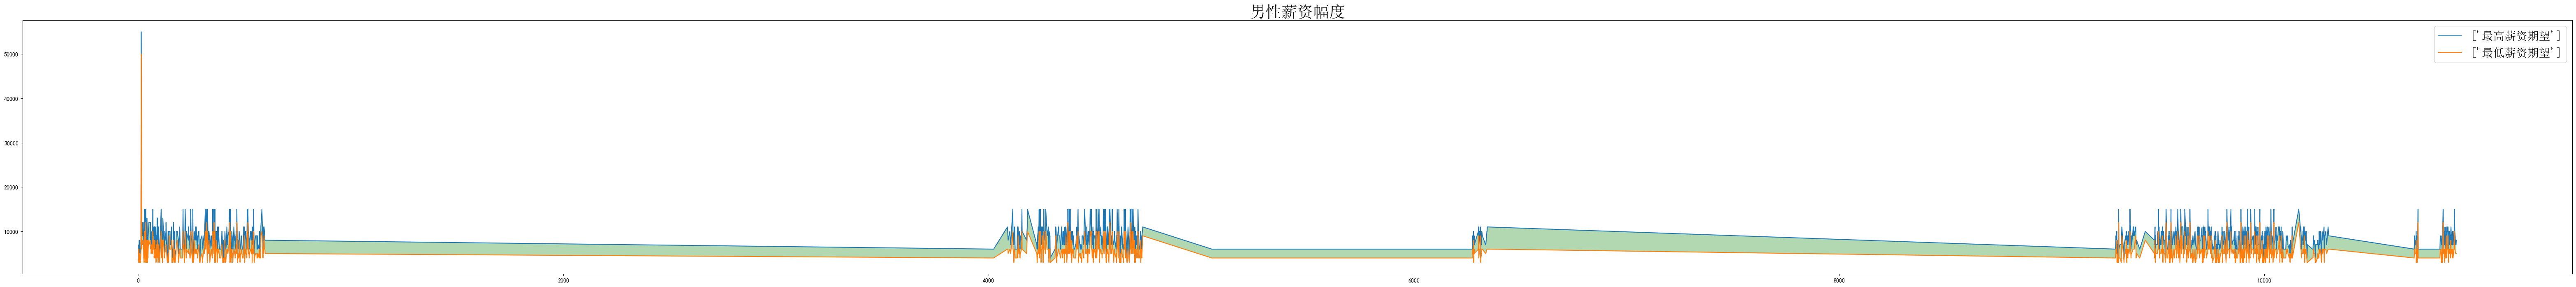

In [26]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

my_font = font_manager.FontProperties(fname='G:/FTP/a学校资料/项目实训_I/simsun.ttc', size=20)

plt.figure(figsize=(80, 8), dpi=100)


# 利用fill_between()填充曲线之间的区域。
x = ability_xzman.index
y1 = ability_xzman['最高薪资期望']
y2 = ability_xzman['最低薪资期望']
plt.plot(x, y1, label = ['最高薪资期望'])
plt.plot(x, y2, label = ['最低薪资期望'])
plt.fill_between(x, y1, y2, facecolor="green", alpha=0.3)
plt.title('男性薪资幅度', fontproperties=my_font, size=28)
plt.legend(prop=my_font)
plt.savefig('F:/amyself/c题爬虫/第二题/用户画像/图片/男性薪资幅度.jpg')
plt.show()

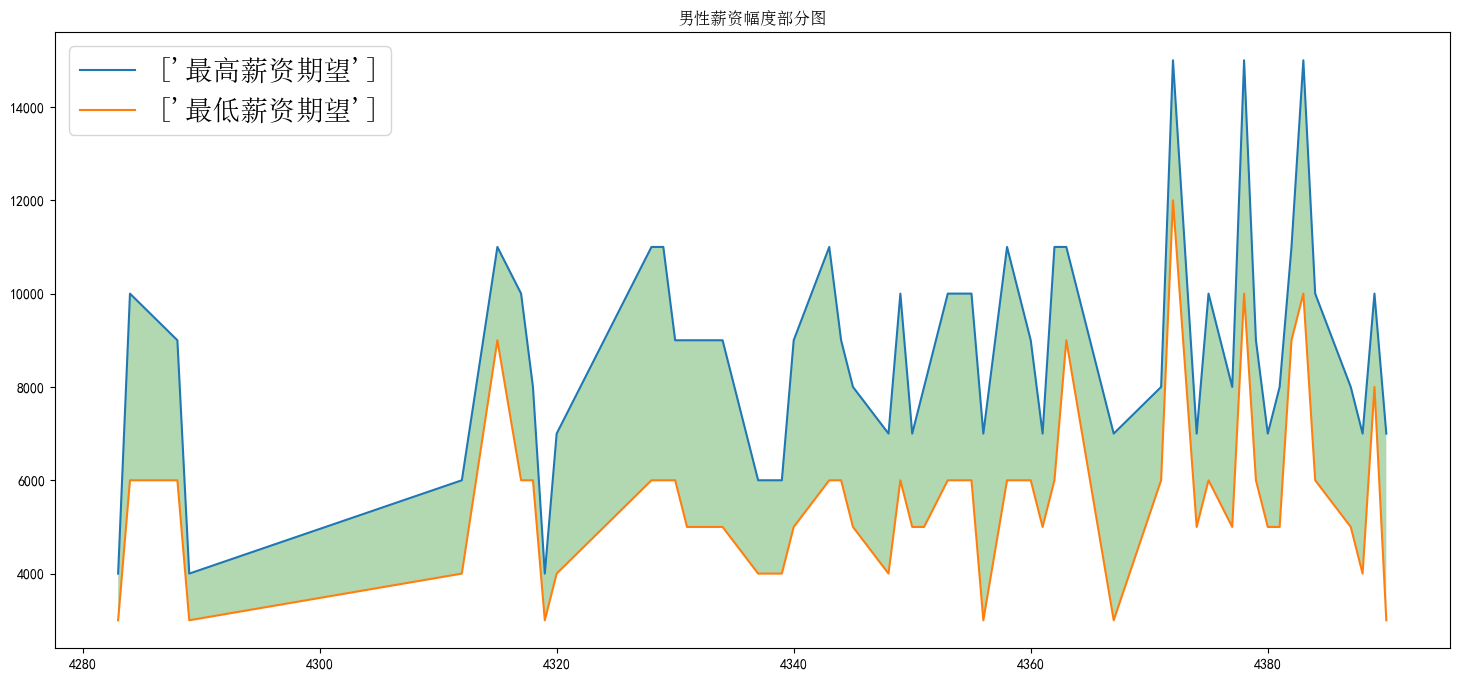

In [27]:
# 截取较为明显部分显示
plt.figure(figsize=(18, 8), dpi=100)
plt.plot(x[400:450], y1[400:450], label = ['最高薪资期望'])
plt.plot(x[400:450], y2[400:450], label = ['最低薪资期望'])
plt.fill_between(x[400:450], y1[400:450], y2[400:450], facecolor="green", alpha=0.3)
plt.title('男性薪资幅度部分图', fontproperties=my_font, size=12)
plt.legend(prop=my_font)
plt.savefig('F:/amyself/c题爬虫/第二题/用户画像/图片/男性薪资幅度部分图.jpg')
plt.show()

##### 男性期望最高薪资分布图

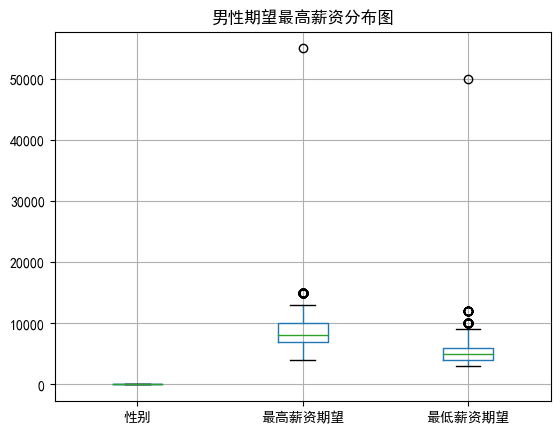

count     1190.000000
mean      8513.445378
std       2890.092830
min       4000.000000
25%       7000.000000
50%       8000.000000
75%      10000.000000
max      55000.000000
Name: 最高薪资期望, dtype: float64


In [30]:
ability_xzman.boxplot()  # 也可用plot.box()
plt.title('男性期望最高薪资分布图')
plt.savefig('F:/amyself/c题爬虫/第二题/用户画像/图片/男性期望最高薪资分布图.jpg')
plt.show()
print(ability_xzman['最高薪资期望'].describe())

##### 女性-薪资幅度

In [31]:
ability_xzwoman = ability_xzmax[ability_xzmax['性别']==1.0] # 获取男性数据
ability_xzwoman

,性别,最高薪资期望,最低薪资期望
1,1.0,5000,4000
11,1.0,8000,5000
14,1.0,4000,3000
15,1.0,8000,5000
19,1.0,7000,5000
...,...,...,...
10901,1.0,9000,5000
10904,1.0,7000,5000
10905,1.0,8000,5000
10906,1.0,15000,10000


In [32]:
max(ability_xzwoman['最高薪资期望'])

15000

In [33]:
min(ability_xzwoman['最低薪资期望'])

3000

In [34]:
ability_xzwoman.index

Int64Index([    1,    11,    14,    15,    19,    21,    22,    26,    30,
               31,
            ...
            10891, 10895, 10897, 10898, 10899, 10901, 10904, 10905, 10906,
            10907],
           dtype='int64', length=975)

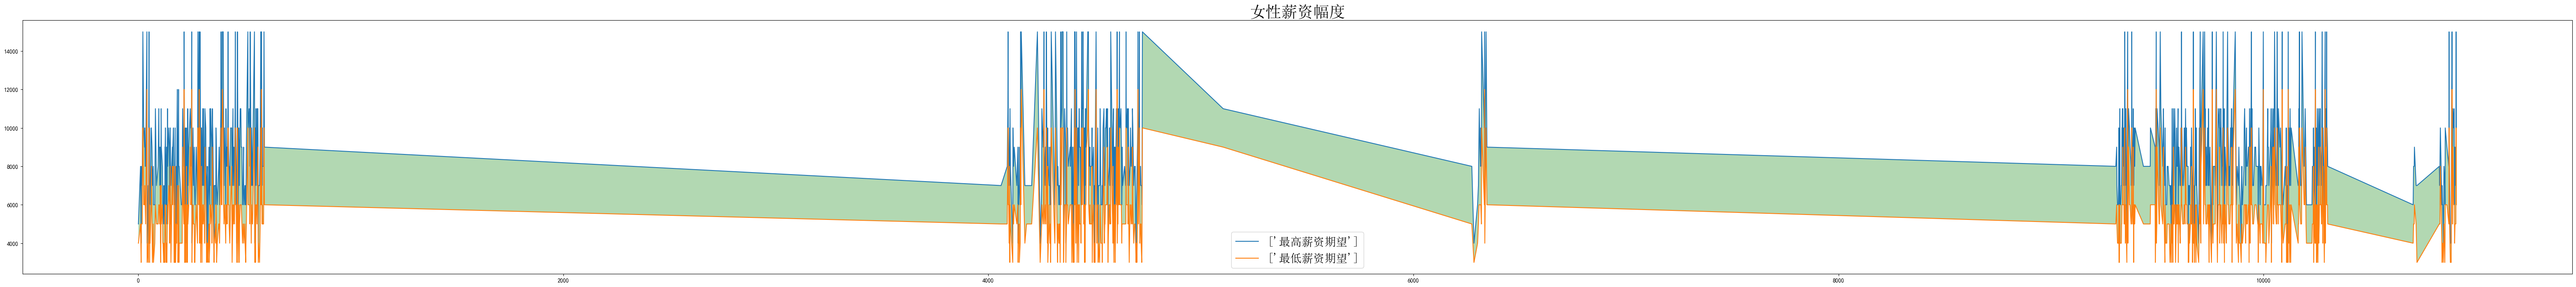

In [35]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

my_font = font_manager.FontProperties(fname='G:/FTP/a学校资料/项目实训_I/simsun.ttc', size=20)

plt.figure(figsize=(80, 8), dpi=100)


# 利用fill_between()填充曲线之间的区域。
x = ability_xzwoman.index
y1 = ability_xzwoman['最高薪资期望']
y2 = ability_xzwoman['最低薪资期望']
plt.plot(x, y1, label = ['最高薪资期望'])
plt.plot(x, y2, label = ['最低薪资期望'])
plt.fill_between(x, y1, y2, facecolor="green", alpha=0.3)
plt.title('女性薪资幅度', fontproperties=my_font, size=28)
plt.legend(prop=my_font)
plt.savefig('F:/amyself/c题爬虫/第二题/用户画像/图片/女性薪资幅度.jpg')
plt.show()

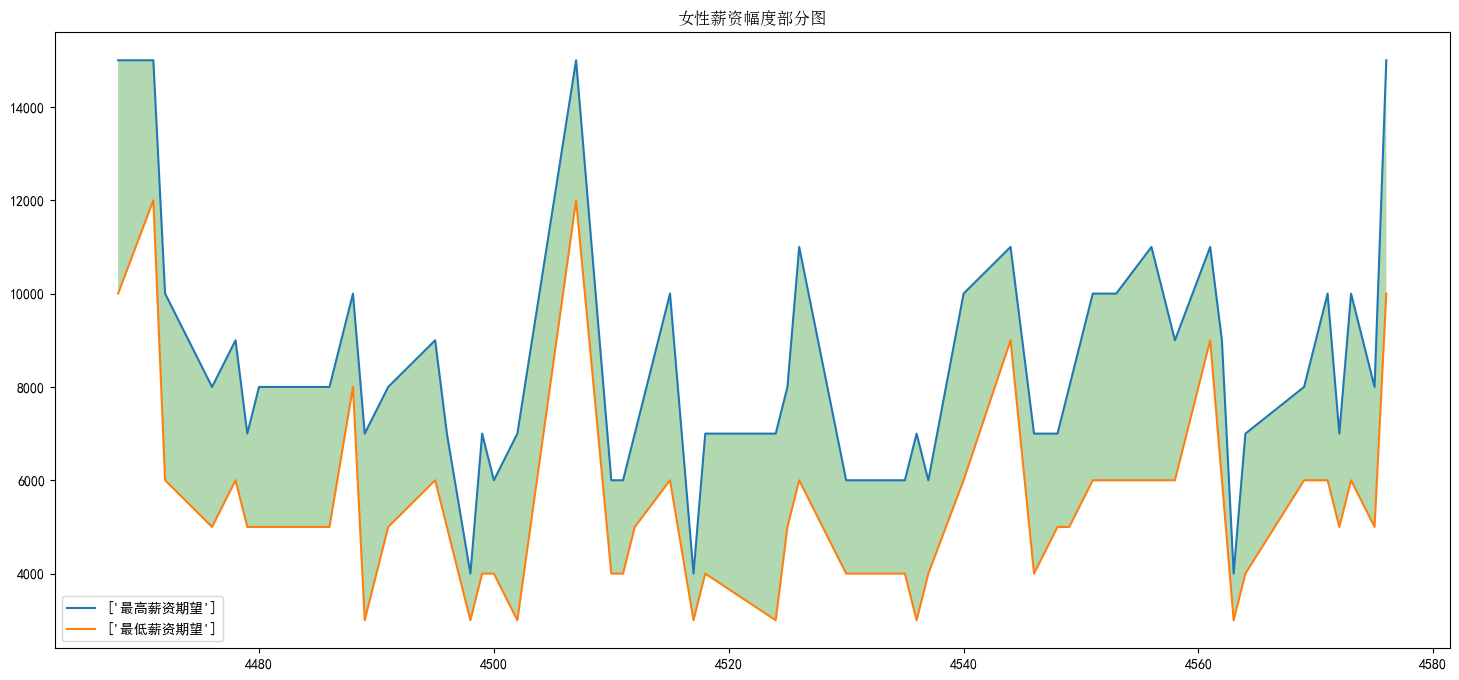

In [36]:
# 截取较为明显部分显示
plt.figure(figsize=(18, 8), dpi=100)
plt.plot(x[400:450], y1[400:450], label = ['最高薪资期望'])
plt.plot(x[400:450], y2[400:450], label = ['最低薪资期望'])
plt.fill_between(x[400:450], y1[400:450], y2[400:450], facecolor="green", alpha=0.3)
plt.title('女性薪资幅度部分图', fontproperties=my_font, size=12)
plt.legend()
plt.savefig('F:/amyself/c题爬虫/第二题/用户画像/图片/女性薪资幅度部分图.jpg')
plt.show()

##### 女性期望最高薪资分布图

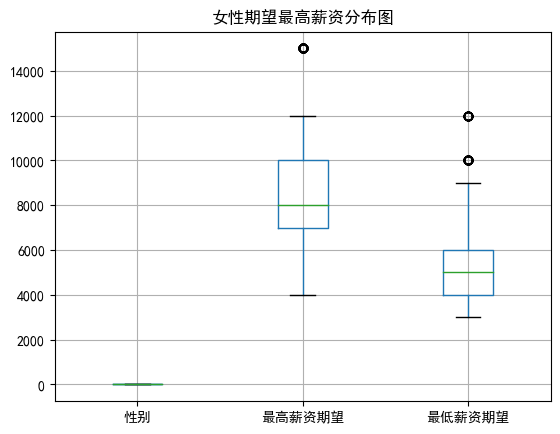

count      975.000000
mean      8646.153846
std       2631.534221
min       4000.000000
25%       7000.000000
50%       8000.000000
75%      10000.000000
max      15000.000000
Name: 最高薪资期望, dtype: float64


In [37]:
ability_xzwoman.boxplot()  # 也可用plot.box()
plt.title('女性期望最高薪资分布图')
plt.savefig('F:/amyself/c题爬虫/第二题/用户画像/图片/女性期望最高薪资分布图.jpg')
plt.show()
print(ability_xzwoman['最高薪资期望'].describe())